In [2]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize)

In [3]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [9]:
Smarket = load_data('Smarket')
Smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


In [10]:
Smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

(1250, 9)
            Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000  0.029700  0.030596  0.033195  0.035689  0.029788  0.539006   
Lag1    0.029700  1.000000 -0.026294 -0.010803 -0.002986 -0.005675  0.040910   
Lag2    0.030596 -0.026294  1.000000 -0.025897 -0.010854 -0.003558 -0.043383   
Lag3    0.033195 -0.010803 -0.025897  1.000000 -0.024051 -0.018808 -0.041824   
Lag4    0.035689 -0.002986 -0.010854 -0.024051  1.000000 -0.027084 -0.048414   
Lag5    0.029788 -0.005675 -0.003558 -0.018808 -0.027084  1.000000 -0.022002   
Volume  0.539006  0.040910 -0.043383 -0.041824 -0.048414 -0.022002  1.000000   
Today   0.030095 -0.026155 -0.010250 -0.002448 -0.006900 -0.034860  0.014592   

           Today  
Year    0.030095  
Lag1   -0.026155  
Lag2   -0.010250  
Lag3   -0.002448  
Lag4   -0.006900  
Lag5   -0.034860  
Volume  0.014592  
Today   1.000000  


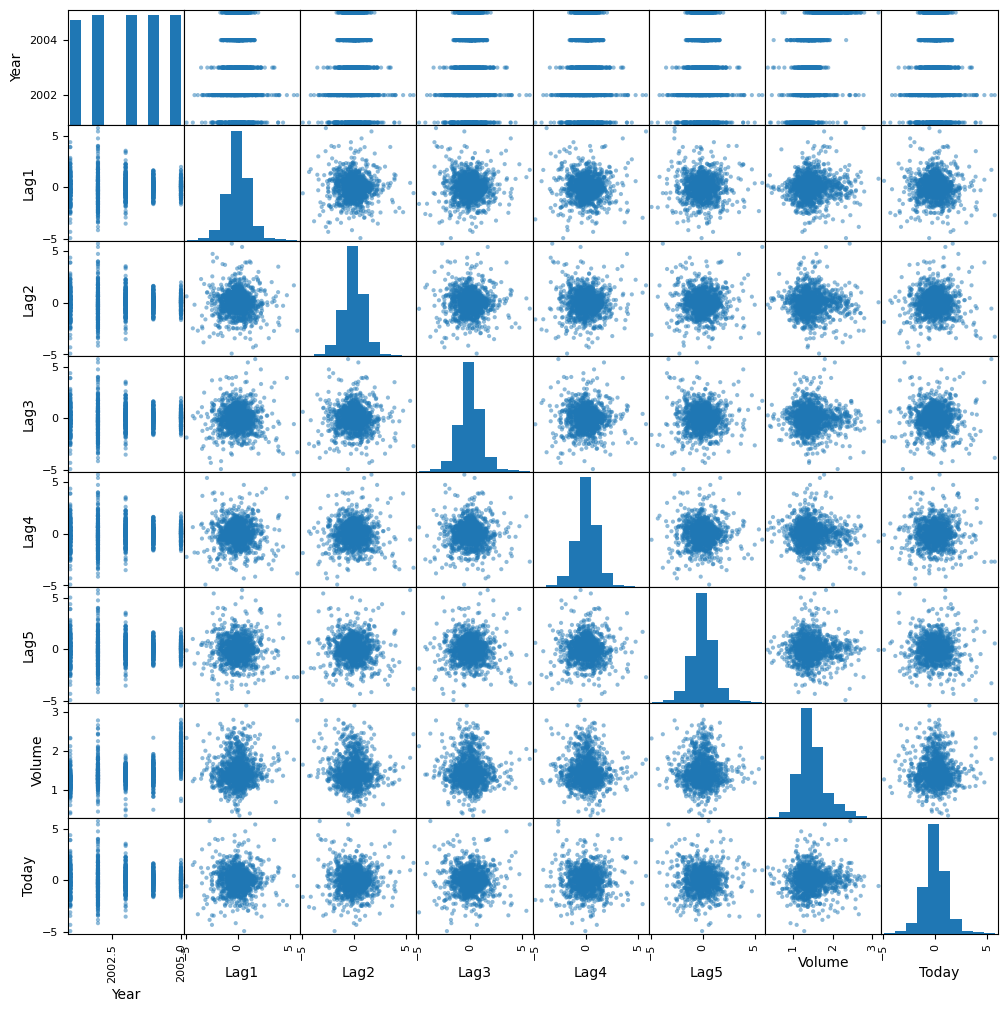

In [20]:

print(Smarket.shape)
print(Smarket.corr(numeric_only=True))
pd.plotting.scatter_matrix(Smarket, figsize=(12,12));

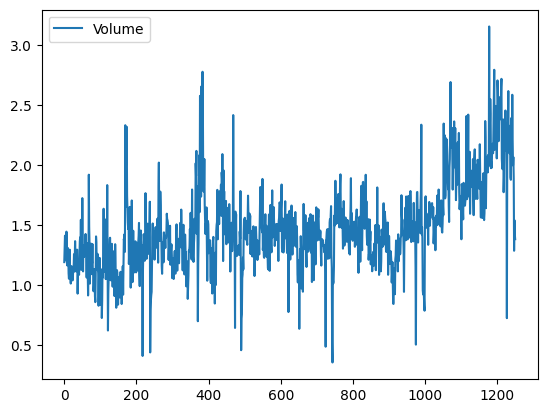

In [23]:
Smarket.plot(y='Volume')
Smarket.plot

In [26]:
allvars = Smarket.columns.drop(['Today', 'Direction', 'Year'])
design = MS(allvars)
X = design.fit_transform(Smarket)
y = Smarket.Direction == 'Up'
glm = sm.GLM(y, X, family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,-0.1260,0.241,-0.523,0.601
Lag1,-0.0731,0.050,-1.457,0.145
Lag2,-0.0423,0.050,-0.845,0.398
Lag3,0.0111,0.050,0.222,0.824
Lag4,0.0094,0.050,0.187,0.851
Lag5,0.0103,0.050,0.208,0.835
Volume,0.1354,0.158,0.855,0.392


In [27]:
results.params

intercept   -0.126000
Lag1        -0.073074
Lag2        -0.042301
Lag3         0.011085
Lag4         0.009359
Lag5         0.010313
Volume       0.135441
dtype: float64

In [28]:
results.pvalues

intercept    0.600700
Lag1         0.145232
Lag2         0.398352
Lag3         0.824334
Lag4         0.851445
Lag5         0.834998
Volume       0.392404
dtype: float64

In [30]:
probs = results.predict()
probs[:10]

array([0.50708413, 0.48146788, 0.48113883, 0.51522236, 0.51078116,
       0.50695646, 0.49265087, 0.50922916, 0.51761353, 0.48883778])

In [32]:
labels = np.array(['Down']*1250)
labels[probs>0.5] = "Up"

array(['Up', 'Down', 'Down', ..., 'Up', 'Up', 'Up'], dtype='<U4')

In [34]:
confusion_table(labels, Smarket.Direction)

Truth,Down,Up
Predicted,,
Down,145,141
Up,457,507


In [35]:
(507 + 145)/1250, np.mean(labels == Smarket.Direction)

(0.5216, 0.5216)

In [40]:
train = (Smarket.Year < 2005)
Smarket_train = Smarket.loc[train]
print(Smarket_train)
Smarket_test = Smarket.loc[~train]
Smarket_test

     Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today Direction
0    2001  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959        Up
1    2001  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032        Up
2    2001  1.032  0.959  0.381 -0.192 -2.624  1.4112 -0.623      Down
3    2001 -0.623  1.032  0.959  0.381 -0.192  1.2760  0.614        Up
4    2001  0.614 -0.623  1.032  0.959  0.381  1.2057  0.213        Up
..    ...    ...    ...    ...    ...    ...     ...    ...       ...
993  2004  0.046  0.342  0.904  0.038 -0.749  0.9561 -0.431      Down
994  2004 -0.431  0.046  0.342  0.904  0.038  0.9220  0.715        Up
995  2004  0.715 -0.431  0.046  0.342  0.904  0.9830 -0.007      Down
996  2004 -0.007  0.715 -0.431  0.046  0.342  0.9259  0.008        Up
997  2004  0.008 -0.007  0.715 -0.431  0.046  0.8298 -0.134      Down

[998 rows x 9 columns]


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
998,2005,-0.134,0.008,-0.007,0.715,-0.431,0.78690,-0.812,Down
999,2005,-0.812,-0.134,0.008,-0.007,0.715,1.51080,-1.167,Down
1000,2005,-1.167,-0.812,-0.134,0.008,-0.007,1.72100,-0.363,Down
1001,2005,-0.363,-1.167,-0.812,-0.134,0.008,1.73890,0.351,Up
1002,2005,0.351,-0.363,-1.167,-0.812,-0.134,1.56910,-0.143,Down
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


In [43]:
X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]
glm_train = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog = X_test)

In [46]:
D = Smarket.Direction
print(D)
L_train, L_test = D.loc[train], D.loc[~train]
print(L_train)
L_test

0         Up
1         Up
2       Down
3         Up
4         Up
        ... 
1245      Up
1246    Down
1247      Up
1248    Down
1249    Down
Name: Direction, Length: 1250, dtype: category
Categories (2, object): ['Down', 'Up']
0        Up
1        Up
2      Down
3        Up
4        Up
       ... 
993    Down
994      Up
995    Down
996      Up
997    Down
Name: Direction, Length: 998, dtype: category
Categories (2, object): ['Down', 'Up']


998     Down
999     Down
1000    Down
1001      Up
1002    Down
        ... 
1245      Up
1246    Down
1247      Up
1248    Down
1249    Down
Name: Direction, Length: 252, dtype: category
Categories (2, object): ['Down', 'Up']

In [45]:
labels = np.array(['Down']*252)
labels[probs>0.5] = 'Up'
confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,77,97
Up,34,44


In [47]:
np.mean(labels == L_test), np.mean(labels != L_test)

(0.4801587301587302, 0.5198412698412699)

In [48]:
model = MS(['Lag1', 'Lag2']).fit(Smarket)
X = model.transform(Smarket)
X_train, X_test = X.loc[train], X.loc[~train]
glm_train = sm.GLM(y_train, X_train, family = sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog = X_test)
labels = np.array(['Down']*252)
labels[probs>0.5] = 'Up'
confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,35,35
Up,76,106


In [49]:
newdata = pd.DataFrame({'Lag1':[1.2, 1.5],
'Lag2':[1.1, -0.8]})

newX = model.transform(newdata)
results.predict(newX)


0    0.479146
1    0.496094
dtype: float64